In [2]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

# Basic info of the dataset

In [3]:
# Loading the dataset
data = pd.read_csv("bank-additional-full.csv",sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There are no missing values in the dataset. So we don't need to handle missing data for this case study

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
print(data["job"].value_counts())
print("*"*25)
print(data["marital"].value_counts())
print("*"*25)
print(data["education"].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
*************************
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
*************************
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [7]:
print(data["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


From the above distribution we can be sure that the data is imbalanced, as the number of "no"s are also 8 times the number of "yes"

In [8]:
data.index.shape

(41188,)

# Exploratory Data Analysis

### Distribution of Class variable

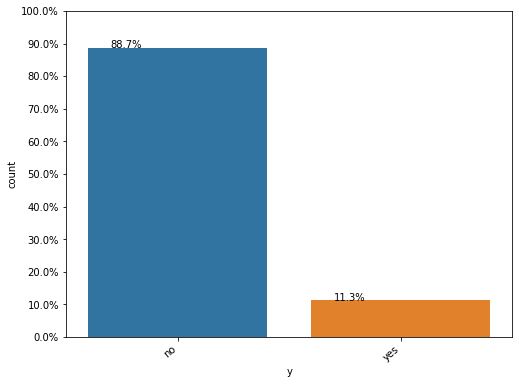

In [9]:
%matplotlib inline
plt.figure(figsize=(8,6))
Y = data["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=data)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

# Univariate Analysis

In [11]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [10]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

## Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

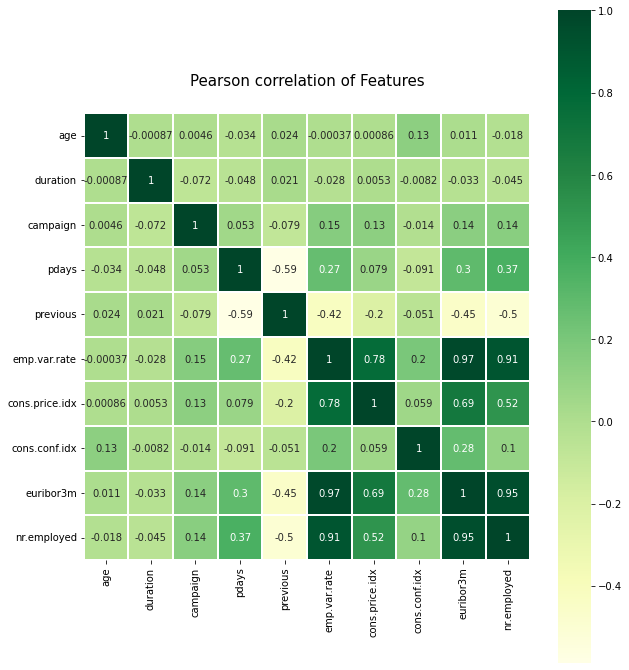

In [11]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.

# Data Preprocessing

In [12]:
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Dealing with Missing data

From the above basic info of each feature, we know that there are no missing values in this dataset.

## Dealing with duplicate data

In [14]:
data_dup = data[data.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [15]:
data_dup.shape

(12, 21)

So we have 12 rows which are duplicates. We will drop these duplicate rows before proceeding furthur.

In [16]:
data = data.drop_duplicates()
data.shape

(41176, 21)

## Separate inpedendent and target variables

In [17]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (41176, 20)
Shape of Y: (41176,)


## Train Test split

In [18]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 20)
X CV: (6588, 20)
X Test: (8236, 20)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


In [19]:
# Replace "no" with 0 and "yes" with 1

y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

# Encoding Categorical Features

For this case study I will encode categorical features using two methods:
- One hot encoding
- Response coding

And compare the results to see which encoding method performed better for the data that we have. 

## One Hot Encoding Categorical features

The next big step for our data preprocessing is to encode all the categorical features so that we can apply models on the data.

In [20]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [21]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)


In [23]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital


d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is depre

Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing


d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is depre

Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (26352, 63)
Shape of CV:  (6588, 63)
Shape of test:  (8236, 63)


d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\Anaconda\envs\qc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is depre

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26352 entries, 1018 to 2287
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            26352 non-null  int64  
 1   duration                       26352 non-null  int64  
 2   campaign                       26352 non-null  int64  
 3   pdays                          26352 non-null  int64  
 4   previous                       26352 non-null  int64  
 5   emp.var.rate                   26352 non-null  float64
 6   cons.price.idx                 26352 non-null  float64
 7   cons.conf.idx                  26352 non-null  float64
 8   euribor3m                      26352 non-null  float64
 9   nr.employed                    26352 non-null  float64
 10  job_admin.                     26352 non-null  int64  
 11  job_blue-collar                26352 non-null  int64  
 12  job_entrepreneur               26352 non-nul

In [76]:
data_x.to_csv("encoded_data_x.csv")
data_y.to_csv("data_y.csv")

## Benchmark model

We will create a simple LogisticRegression model without any hyper-parameter tuning and apply that to the data in two ways. 

- Use "Duration" feature to see how the model performs with this feature. It will probably give very high AUC as the duration feature is very correlated with the target variable. But obviously we can't use the Duration feature for actual modelling.
- Next remove the "Duration" feature, and apply the same model to check how the model performs.

## Visualize data with T-SNE plot

We will plot the t-sne plot for the dataset with "Duration" feature.

d:\Anaconda\envs\qc\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Anaconda\envs\qc\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


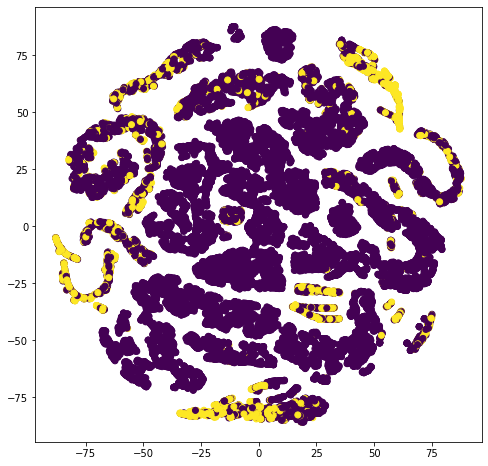

In [25]:
%matplotlib inline

# T-SNE plot for train dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_train) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values)
plt.show()

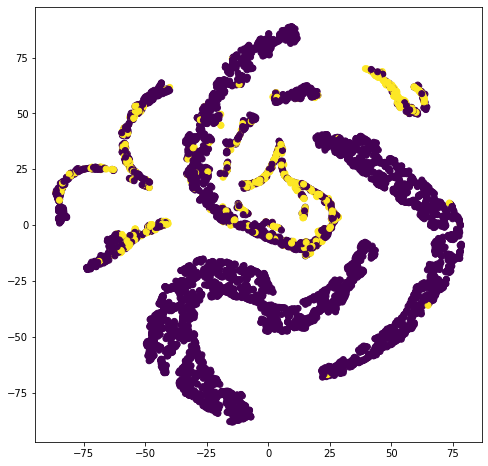

In [ ]:
%matplotlib inline

# T-SNE plot for CV dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_cv) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_cv.values)
plt.show()

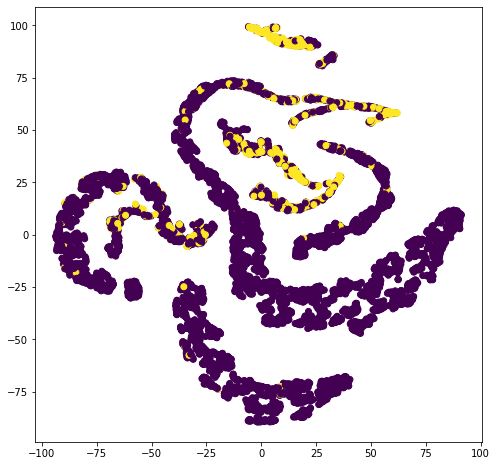

In [ ]:
%matplotlib inline

# T-SNE plot for test dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_test) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_test.values)
plt.show()

## Modelling with "Duration" Column

Seeing how the model performs with the "duration" feature. It is to be noted again that the duration feature can not be included in the final model as it is highly correlated with the target variable, and to build any reasonable predictive model, we cannot include this feature.

In [28]:
# with "duration" column
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score with duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score with duration column:  0.9312898472052688


d:\Anaconda\envs\qc\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we can see that, with duration column the AUC score is very good, 0.933. Which is a lot better than what the original paper achieved (AUC of 0.8). Now let's see how the same model does without the duration feature.

# Removing "Duration" feature 

**duration:** last contact duration, in seconds (numeric). 

***Important note:*** this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [29]:
# Removing duration feature 

# From Train
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

# From CV
X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

# From Test
X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (26352, 62)
The shape of the cv dataset:  (6588, 62)
The shape of the test dataset:  (8236, 62)


## Visualize using T-SNE

Visualize the dataset with T-SNE plot but this time without the "Duration" column to see if there is any noticable change in the data.

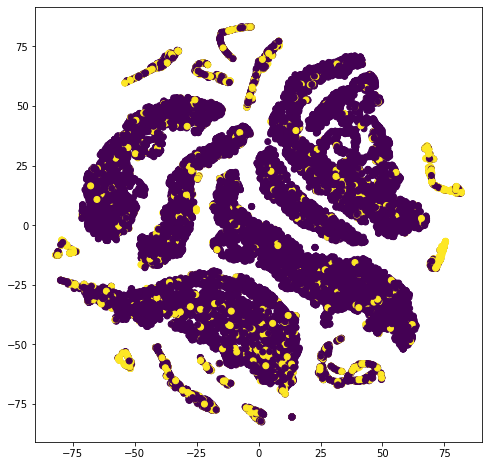

In [ ]:
%matplotlib inline

# T-SNE plot for train dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_train) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values)
plt.show()

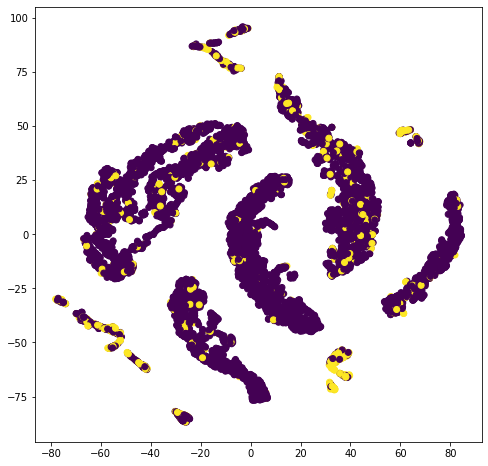

In [ ]:
%matplotlib inline

# T-SNE plot for CV dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_cv) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_cv.values)
plt.show()

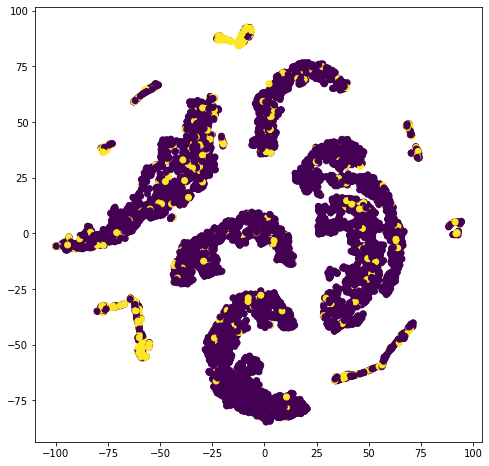

In [ ]:
%matplotlib inline

# T-SNE plot for test dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_test) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_test.values)
plt.show()

## Modelling Without "Duration" Column

Here we will just implement a LogisticRegression model without any hyperparameter tuning just to check how much the performance changed once we removed the "Duration" column from the dataset. 

We will use two variations of the LogisticRegression model:
- With class balancing 
- Without class balancing

This is to check the model is performing in both the scenarios.

In [31]:
# without "duration" column
# X_train = X_train.drop("duration", axis=1)
# X_test = X_test.drop("duration", axis=1)

# print(X_train.shape)
# print(X_test.shape)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column:  0.7920446265326072


d:\Anaconda\envs\qc\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# without "duration" column and without class balancing
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column and class balancing: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column and class balancing:  0.794925194915685


d:\Anaconda\envs\qc\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [34]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

AUC for k =  1 is 0.6574929929876816
AUC for k =  3 is 0.7089667354102624
AUC for k =  5 is 0.7349667896504924
AUC for k =  7 is 0.7457039969153817
AUC for k =  9 is 0.7495185000453967
AUC for k =  11 is 0.7529467184071297
AUC for k =  13 is 0.7540913051732209
AUC for k =  15 is 0.7546921925905489


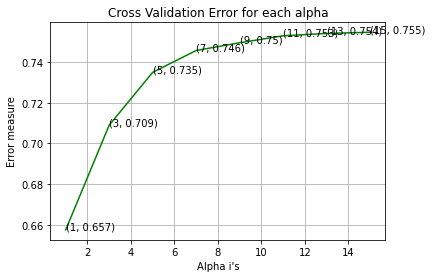

For values of best alpha =  15 The train AUC is: 0.8681257819888273
For values of best alpha =  15 The cross validation AUC is: 0.7546921925905489
For values of best alpha =  15 The test AUC is: 0.7912524300550258


In [35]:
%matplotlib inline

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### Logistic Regression

AUC for k =  1e-05 is 0.7384302641617114
AUC for k =  0.0001 is 0.753397266056582
AUC for k =  0.001 is 0.7639097301076904
AUC for k =  0.01 is 0.7741144398104423
AUC for k =  0.1 is 0.7688906340093317
AUC for k =  1 is 0.7742611242584713
AUC for k =  10 is 0.7713920519196914
AUC for k =  100 is 0.7713019659725096
AUC for k =  1000 is 0.7688113961081456


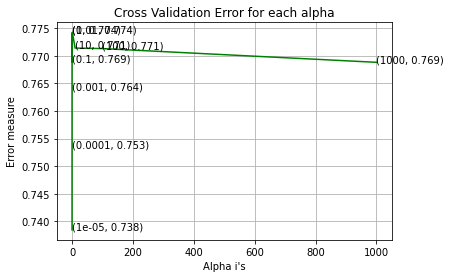

For values of best alpha =  1 The train AUC is: 0.7837632412656448
For values of best alpha =  1 The cross validation AUC is: 0.7742611242584713
For values of best alpha =  1 The test AUC is: 0.8032906611677938


In [36]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### Linear SVM

AUC for alpha =  1e-05 is 0.5
AUC for alpha =  0.0001 is 0.5
AUC for alpha =  0.001 is 0.751711102385509
AUC for alpha =  0.01 is 0.7493931579487288
AUC for alpha =  0.1 is 0.7503364662961822
AUC for alpha =  1 is 0.7357720212385874
AUC for alpha =  10 is 0.7073888163720596
AUC for alpha =  100 is 0.5597431371369884
AUC for alpha =  1000 is 0.43955079656494267


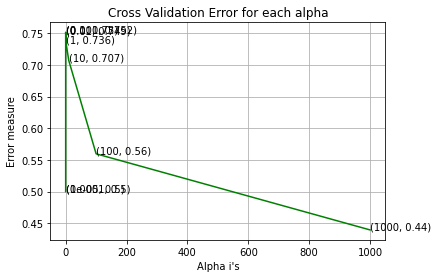

For values of best alpha =  0.001 The train AUC is: 0.7555694642833849
For values of best alpha =  0.001 The cross validation AUC is: 0.749441266674449
For values of best alpha =  0.001 The test AUC is: 0.7873996935807983


In [37]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    linearSVM = SGDClassifier(penalty='l2',alpha=i,class_weight='balanced')
    linearSVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for alpha = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

linearSVM = SGDClassifier(penalty='l2', alpha=alpha[best_alpha], class_weight='balanced')
linearSVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### RBF Kernal SVM

In [ ]:
%matplotlib inline
from sklearn.svm import SVC

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    SVM = SVC(C=i,class_weight='balanced')
    SVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for C = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

SVM = SVC(C=alpha[best_alpha], class_weight='balanced')
SVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### Random Forest

AUC for number of estimators =  10 is 0.764054645852568
AUC for number of estimators =  50 is 0.7683892656226601
AUC for number of estimators =  100 is 0.7676640973305553
AUC for number of estimators =  500 is 0.7683241773466858
AUC for number of estimators =  1000 is 0.768231615215092
AUC for number of estimators =  2000 is 0.7683812475017069
AUC for number of estimators =  3000 is 0.7686295734241738


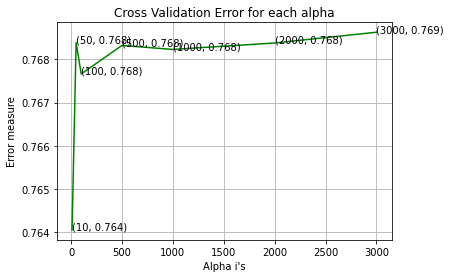

For values of best alpha =  3000 The train AUC is: 0.9997693073698725
For values of best alpha =  3000 The cross validation AUC is: 0.7686295734241738
For values of best alpha =  3000 The test AUC is: 0.7948661782501968


In [39]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### XGBoost

In [41]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000]
cv_auc_array=[]
for i in alpha:
    x_cfl=x_cfl=XGBClassifier(n_estimators=i)#, tree_method="gpu_hist")
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=x_cfl=XGBClassifier(n_estimators=i, tree_method="gpu_hist")
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

KeyboardInterrupt: 

### XGBoost with RandomizedSearchCV hyper parameter tuning

In [46]:
# For RandomizedSearchCV I will use 80% of data for train and
# 20% of data for test. RandomizedSearchCV will internally split train data for Cross validation.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Train:", y_test.shape)

X Train: (32940, 20)
X Test: (8236, 20)
Y Train: (32940,)
Y Train: (8236,)


In [50]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [51]:
OneHotEncoder(categorical_cols, X_train, X_test)
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (26352, 63)
Shape of test:  (8236, 63)


In [53]:
x_cfl=XGBClassifier(max_bin=16)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_iter=20, cv=10, scoring='roc_auc')
random_cfl.fit(X_train, y_train)
print (random_cfl.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5
[CV 1/10; 1/20] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.945 total time=   5.3s
[CV 2/10; 1/20] START colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5
[CV 2/10; 1/20] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.944 total time=   5.1s
[CV 3/10; 1/20] START colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5
[CV 3/10; 1/20] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5;, score=0.948 total time=   5.0s
[CV 4/10; 1/20] START colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=0.5
[CV 4/10; 1/20] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subs

KeyboardInterrupt: 

In [54]:
x_cfl=XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.1, \
                    colsample_bytree=0.5,subsample=1,tree_method='gpu_hist', max_bin=16)
x_cfl.fit(X_train,y_train,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ("For values of best alpha = 200 The train AUC is:",roc_auc_score(y_train, predict_y[:, 1]))
predict_y = sig_clf.predict_proba(X_test)
print("For values of best alpha = 200 The test AUC is:",roc_auc_score(y_test, predict_y[:, 1]))

[00:04:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: [00:04:49] C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:625: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

In [55]:
import matplotlib.pyplot as plt; plt.rcdefaults()
feature_importance = x_cfl.get_booster().get_score(importance_type='gain')

objects = feature_importance.keys()
y_pos = np.arange(len(objects))
performance = feature_importance.values()
plt.figure(figsize=(8,20))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph')
plt.show()

NotFittedError: need to call fit or load_model beforehand

From the above feature importance graph we can see that, the most relevent features are the following:
- nr.employed
- emp.var.rate
- poutcome_success
- euribor3m
- etc.

# Response coding

#### Train test split


In [56]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 20)
X CV: (6588, 20)
X Test: (8236, 20)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


In [57]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [58]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
23408,58,admin.,married,high.school,no,no,no,cellular,aug,wed,569,13,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
29983,41,technician,married,university.degree,no,no,no,cellular,apr,tue,219,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
13747,29,entrepreneur,married,professional.course,no,yes,no,cellular,jul,thu,125,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
16316,24,admin.,single,high.school,no,no,yes,cellular,jul,tue,210,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
27061,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,569,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8


In [59]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [60]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [61]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: Categorical Features
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train dataframe
# build a vector (1*2) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+20*alpha)
# feat_dict is like a look up table, for every categorical data it store a (1*2) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'feat_dict' look up table to 'res_fea'
# if it is not there is train:
# we add [1/2, 1/2] to 'res_fea'
# return 'res_fea'
# ----------------------

# get_fea_dict: Get categorical data Feature Dict
def get_fea_dict(alpha, feature, train_df, train_df_y):
    # value_count: it contains a dict like
    value_count = train_df[feature].value_counts()
    
    # feat_dict : Categorical feature Dict, which contains the probability array for each categorical variable
    feat_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of the particular 
        # categorical feature belongs to particular class
        # vec is 2 diamensional vector
        vec = []
        for k in range(0, 2):
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df_y==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))

        # we are adding the categorical feature to the dict as key and vec as value
        feat_dict[i]=vec
    return feat_dict

# Get Response coded feature
def get_response_feature(alpha, feature, train_df, train_df_y):

    feat_dict = get_fea_dict(alpha, feature, train_df, train_df_y)
    # value_count is similar in get_fea_dict
    value_count = train_df[feature].value_counts()
    
    # res_fea: response coded feature, it will contain the response coded feature for each feature value in the data
    res_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to res_fea
    # if not we will add [1/2, 1/2] to res_fea
    for index, row in train_df.iterrows():
        if row[feature] in dict(value_count).keys():
            res_fea.append(feat_dict[row[feature]])
        else:
            res_fea.append([1/2, 1/2])
    return res_fea

In [62]:
def ResponseEncoder(categorical_cols, x_df, y_df):

  """
    This function takes Categorical column names and X and Y dataframe.

    Returns the response coded dataframe
  """
  print("Encoding Train dataset")
  print("Shape of the train dataset before encoding: ", X_train.shape)
  for i in (categorical_cols):
    temp_response_coded_feature = np.array(get_response_feature(alpha=1, feature=i, train_df=x_df, train_df_y=y_df))
    df_response = pd.DataFrame(temp_response_coded_feature, columns=[i+"_0", i+"_1"])
    x_df = pd.concat([x_df, df_response], axis=1)
  
  # Remove the categorical features as the response coded features are added
  x_df = x_df.drop(categorical_cols, axis=1)
  return x_df

In [63]:
# Reset index so that pd.concat works properly in ResponseEncoder function
X_train = X_train.reset_index().drop("index",axis=1)
X_test = X_test.reset_index().drop("index",axis=1)
X_cv = X_cv.reset_index().drop("index",axis=1)

In [64]:
X_train = ResponseEncoder(categorical_cols, X_train, y_train)
print("Shape of the train dataset after encoding: ", X_train.shape)

X_cv = ResponseEncoder(categorical_cols, X_cv, y_cv)
print("Shape of the cv dataset after encoding: ", X_cv.shape)

X_test = ResponseEncoder(categorical_cols, X_test, y_test)
print("Shape of the test dataset after encoding: ", X_test.shape)

Encoding Train dataset
Shape of the train dataset before encoding:  (26352, 20)
Shape of the train dataset after encoding:  (26352, 30)
Encoding Train dataset
Shape of the train dataset before encoding:  (26352, 30)
Shape of the cv dataset after encoding:  (6588, 30)
Encoding Train dataset
Shape of the train dataset before encoding:  (26352, 30)
Shape of the test dataset after encoding:  (8236, 30)


In [65]:
# Remove duration feature
X_train = X_train.drop("duration", axis=1)
X_cv = X_cv.drop("duration", axis=1)
X_test = X_test.drop("duration", axis=1)

In [66]:
X_train.to_csv("Response_coded_features_train.csv")
X_cv.to_csv("Response_coded_features_cv.csv")
X_test.to_csv("Response_coded_features_test.csv")

### KNN

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

AUC for k =  1 is 0.6892692815811569
AUC for k =  3 is 0.7271750154586474
AUC for k =  5 is 0.7437369930303207
AUC for k =  7 is 0.7533350633870685
AUC for k =  9 is 0.758886708016394
AUC for k =  11 is 0.7609873043077136
AUC for k =  13 is 0.7606555236134297
AUC for k =  15 is 0.7642352436958662


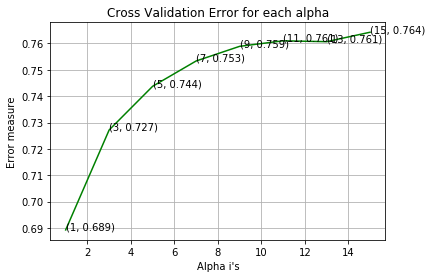

For values of best alpha =  15 The train AUC is: 0.8579027560908474
For values of best alpha =  15 The cross validation AUC is: 0.7642352436958662
For values of best alpha =  15 The test AUC is: 0.7588179261926234


In [ ]:
%matplotlib inline

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### Logistic Regression

AUC for k =  1e-05 is 0.7563957673489795
AUC for k =  0.0001 is 0.7580064489797294
AUC for k =  0.001 is 0.7591216842674381
AUC for k =  0.01 is 0.7643363772819093
AUC for k =  0.1 is 0.7713955256385064
AUC for k =  1 is 0.77901481697226
AUC for k =  10 is 0.7793269962699625
AUC for k =  100 is 0.7796918468051047
AUC for k =  1000 is 0.7795145924581042


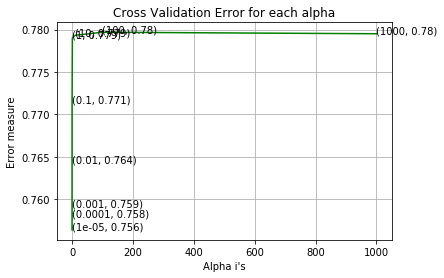

For values of best alpha =  100 The train AUC is: 0.7932716928892307
For values of best alpha =  100 The cross validation AUC is: 0.7796918468051047
For values of best alpha =  100 The test AUC is: 0.7785456926327435


In [ ]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### Linear SVM

/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:453: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:455: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/lib/python3.6/dist-packages/sklearn/calibration.py:453: RuntimeWarning: overflow encountered

AUC for alpha =  1e-05 is 0.5
AUC for alpha =  0.0001 is 0.5
AUC for alpha =  0.001 is 0.7372568002412763
AUC for alpha =  0.01 is 0.740947512136408
AUC for alpha =  0.1 is 0.7435116434288933
AUC for alpha =  1 is 0.7375577095315304
AUC for alpha =  10 is 0.6988044343419817
AUC for alpha =  100 is 0.5287883988035883
AUC for alpha =  1000 is 0.4207704238179307


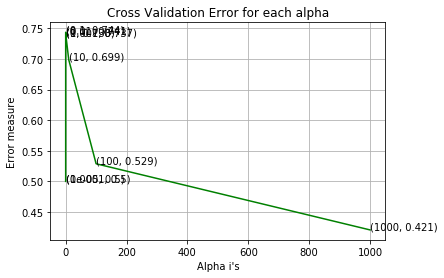

For values of best alpha =  0.1 The train AUC is: 0.7530163400449308
For values of best alpha =  0.1 The cross validation AUC is: 0.744081679037255
For values of best alpha =  0.1 The test AUC is: 0.7576224490091846


In [ ]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    linearSVM = SGDClassifier(penalty='l2',alpha=i,class_weight='balanced')
    linearSVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for alpha = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

linearSVM = SGDClassifier(penalty='l2', alpha=alpha[best_alpha], class_weight='balanced')
linearSVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### RBF Kernal SVM

AUC for C =  1e-05 is 0.7460862323061918
AUC for C =  0.0001 is 0.7460862323061918
AUC for C =  0.001 is 0.7460862323061918
AUC for C =  0.01 is 0.7636404656315556
AUC for C =  0.1 is 0.7760276747942293
AUC for C =  1 is 0.7722338394399492
AUC for C =  10 is 0.758527093933343
AUC for C =  100 is 0.7254473190043089
AUC for C =  1000 is 0.6873026616336615


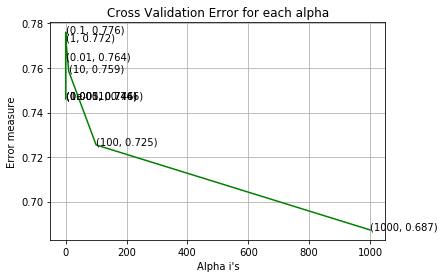

For values of best alpha =  0.1 The train AUC is: 0.7865539927853393
For values of best alpha =  0.1 The cross validation AUC is: 0.7760276747942293
For values of best alpha =  0.1 The test AUC is: 0.7508529620979546


In [ ]:
%matplotlib inline
from sklearn.svm import SVC

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    SVM = SVC(C=i,class_weight='balanced')
    SVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for C = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

SVM = SVC(C=alpha[best_alpha], class_weight='balanced')
SVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### Random Forest

AUC for number of estimators =  10 is 0.7677506035902254
AUC for number of estimators =  50 is 0.7756808419171664
AUC for number of estimators =  100 is 0.7790068457401851
AUC for number of estimators =  500 is 0.7799931306886485
AUC for number of estimators =  1000 is 0.7808271010046929
AUC for number of estimators =  2000 is 0.78140459458155
AUC for number of estimators =  3000 is 0.7812622696339397


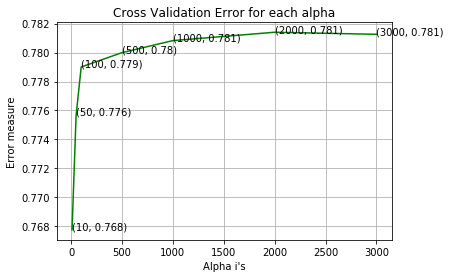

For values of best alpha =  2000 The train AUC is: 0.9991794771349454
For values of best alpha =  2000 The cross validation AUC is: 0.78140459458155
For values of best alpha =  2000 The test AUC is: 0.7759755415777504


In [ ]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### XGBoost

AUC for number of estimators =  10 is 0.7947058037823865
AUC for number of estimators =  50 is 0.802548828793639
AUC for number of estimators =  100 is 0.8044594401960223
AUC for number of estimators =  500 is 0.8035154711034336
AUC for number of estimators =  1000 is 0.8007511345026876
AUC for number of estimators =  2000 is 0.7946001825081741


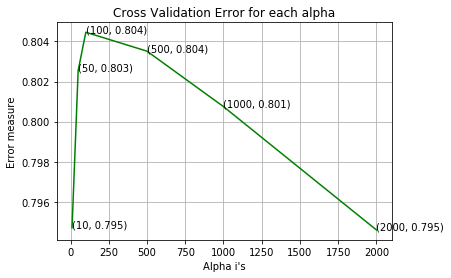

For values of best alpha =  100 The train AUC is: 0.7911513565458436
For values of best alpha =  100 The cross validation AUC is: 0.7926794691773326
For values of best alpha =  100 The test AUC is: 0.7778055194167837


In [ ]:
%matplotlib inline

alpha=[10,50,100,500,1000,2000]
cv_auc_array=[]
for i in alpha:
    x_cfl=x_cfl=XGBClassifier(n_estimators=i, tree_method="gpu_hist")
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=x_cfl=XGBClassifier(n_estimators=i, tree_method="gpu_hist")
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### XGBoost with RandomizedSearchCV hyper parameter tuning

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

X Train: (32940, 20)
X Test: (8236, 20)
Y Train: (32940,)
Y Test: (8236,)


In [ ]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [ ]:
# Reset index so that pd.concat works properly in ResponseEncoder function
X_train = X_train.reset_index().drop("index",axis=1)
X_test = X_test.reset_index().drop("index",axis=1)
X_cv = X_cv.reset_index().drop("index",axis=1)

In [ ]:
X_train = ResponseEncoder(categorical_cols, X_train, y_train)
print("Shape of the train dataset after encoding: ", X_train.shape)

X_test = ResponseEncoder(categorical_cols, X_test, y_test)
print("Shape of the test dataset after encoding: ", X_test.shape)

Encoding Train dataset
Shape of the train dataset before encoding:  (32940, 20)
Shape of the train dataset after encoding:  (32940, 30)
Encoding Train dataset
Shape of the train dataset before encoding:  (32940, 30)
Shape of the test dataset after encoding:  (8236, 30)


In [ ]:
# Remove duration feature
X_train = X_train.drop("duration", axis=1)
X_test = X_test.drop("duration", axis=1)

In [ ]:
x_cfl=XGBClassifier(tree_method='gpu_hist', max_bin=16)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_iter=20, cv=5, scoring='roc_auc')
random_cfl.fit(X_train, y_train)
print (random_cfl.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] subsample=1, n_estimators=500, max_depth=10, learning_rate=0.03, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=1, n_estimators=500, max_depth=10, learning_rate=0.03, colsample_bytree=0.5, score=0.772, total=   7.9s
[CV] subsample=1, n_estimators=500, max_depth=10, learning_rate=0.03, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV]  subsample=1, n_estimators=500, max_depth=10, learning_rate=0.03, colsample_bytree=0.5, score=0.784, total=   7.9s
[CV] subsample=1, n_estimators=500, max_depth=10, learning_rate=0.03, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.8s remaining:    0.0s


[CV]  subsample=1, n_estimators=500, max_depth=10, learning_rate=0.03, colsample_bytree=0.5, score=0.760, total=   7.4s
[CV] subsample=1, n_estimators=500, max_depth=10, learning_rate=0.03, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.2s remaining:    0.0s


[CV]  subsample=1, n_estimators=500, max_depth=10, learning_rate=0.03, colsample_bytree=0.5, score=0.785, total=   7.7s
[CV] subsample=1, n_estimators=500, max_depth=10, learning_rate=0.03, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   30.9s remaining:    0.0s


[CV]  subsample=1, n_estimators=500, max_depth=10, learning_rate=0.03, colsample_bytree=0.5, score=0.755, total=   7.6s
[CV] subsample=0.1, n_estimators=1000, max_depth=10, learning_rate=0.1, colsample_bytree=0.1 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.5s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=1000, max_depth=10, learning_rate=0.1, colsample_bytree=0.1, score=0.785, total=   5.6s
[CV] subsample=0.1, n_estimators=1000, max_depth=10, learning_rate=0.1, colsample_bytree=0.1 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   44.2s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=1000, max_depth=10, learning_rate=0.1, colsample_bytree=0.1, score=0.794, total=   5.6s
[CV] subsample=0.1, n_estimators=1000, max_depth=10, learning_rate=0.1, colsample_bytree=0.1 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   49.8s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=1000, max_depth=10, learning_rate=0.1, colsample_bytree=0.1, score=0.768, total=   5.6s
[CV] subsample=0.1, n_estimators=1000, max_depth=10, learning_rate=0.1, colsample_bytree=0.1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   55.4s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=1000, max_depth=10, learning_rate=0.1, colsample_bytree=0.1, score=0.794, total=   5.6s
[CV] subsample=0.1, n_estimators=1000, max_depth=10, learning_rate=0.1, colsample_bytree=0.1 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.0min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=1000, max_depth=10, learning_rate=0.1, colsample_bytree=0.1, score=0.761, total=   5.5s
[CV] subsample=0.3, n_estimators=100, max_depth=10, learning_rate=0.1, colsample_bytree=0.1 
[CV]  subsample=0.3, n_estimators=100, max_depth=10, learning_rate=0.1, colsample_bytree=0.1, score=0.794, total=   0.6s
[CV] subsample=0.3, n_estimators=100, max_depth=10, learning_rate=0.1, colsample_bytree=0.1 
[CV]  subsample=0.3, n_estimators=100, max_depth=10, learning_rate=0.1, colsample_bytree=0.1, score=0.807, total=   0.6s
[CV] subsample=0.3, n_estimators=100, max_depth=10, learning_rate=0.1, colsample_bytree=0.1 
[CV]  subsample=0.3, n_estimators=100, max_depth=10, learning_rate=0.1, colsample_bytree=0.1, score=0.777, total=   0.6s
[CV] subsample=0.3, n_estimators=100, max_depth=10, learning_rate=0.1, colsample_bytree=0.1 
[CV]  subsample=0.3, n_estimators=100, max_depth=10, learning_rate=0.1, colsample_bytree=0.1, score=0.801, total=   0.6s
[CV] subsample=0.3, n_

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.9min finished


{'subsample': 1, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.5}


In [ ]:
x_cfl=XGBClassifier(n_estimators=2000,max_depth=3,learning_rate=0.01, \
                    colsample_bytree=0.5,subsample=1,tree_method='gpu_hist', max_bin=16)
x_cfl.fit(X_train,y_train,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ("For values of best alpha = 2000 The train AUC is:",roc_auc_score(y_train, predict_y[:, 1]))
predict_y = sig_clf.predict_proba(X_test)
print("For values of best alpha = 2000 The test AUC is:",roc_auc_score(y_test, predict_y[:, 1]))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


For values of best alpha = 2000 The train AUC is: 0.8250426975361628
For values of best alpha = 2000 The test AUC is: 0.803683987322812


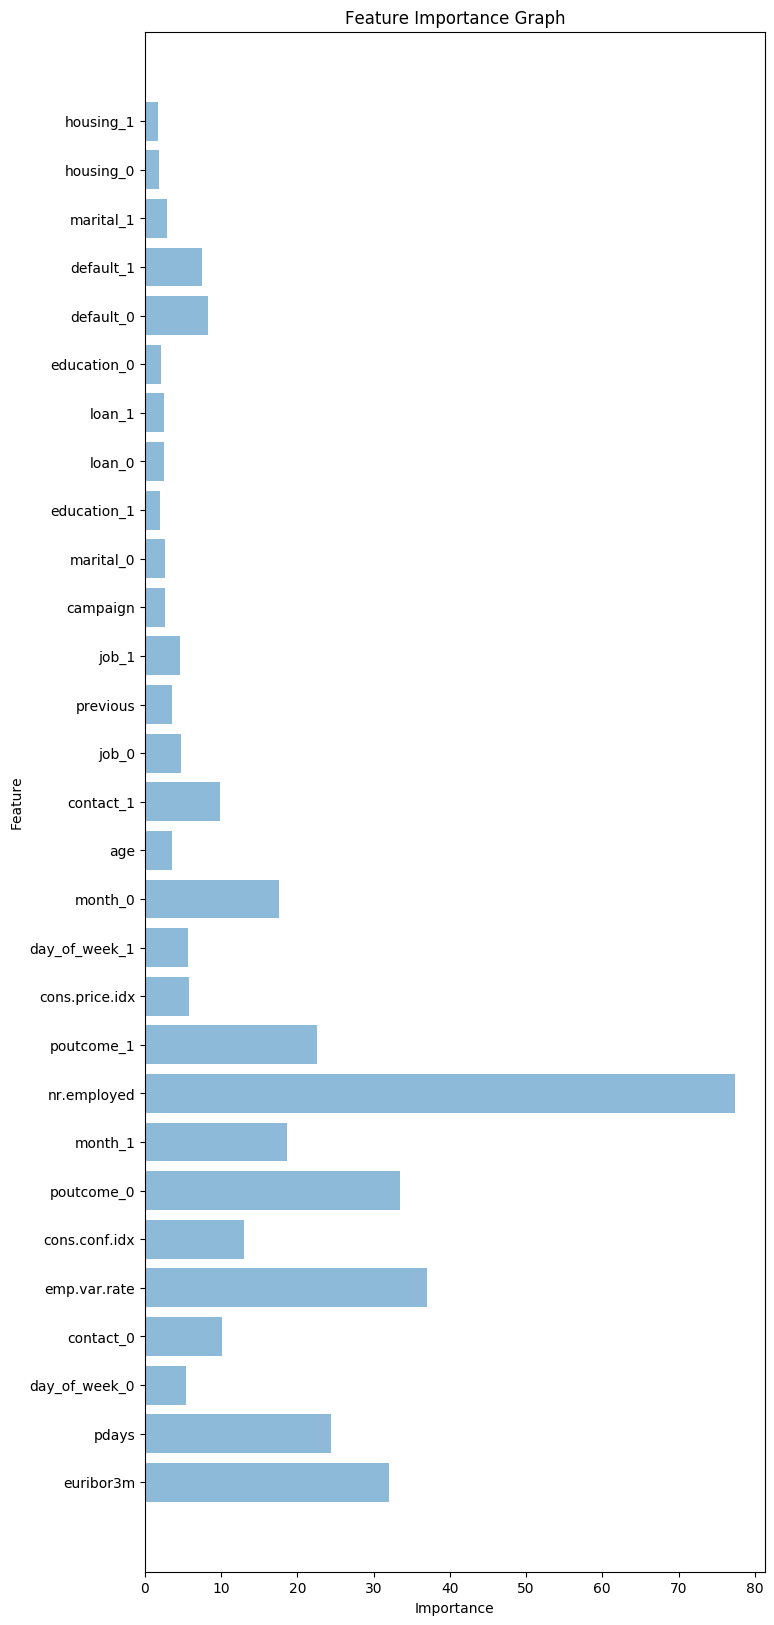

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt; plt.rcdefaults()
feature_importance = x_cfl.get_booster().get_score(importance_type='gain')

objects = feature_importance.keys()
y_pos = np.arange(len(objects))
performance = feature_importance.values()
plt.figure(figsize=(8,20))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph')
plt.show()

# Conclusion

| Encoding | Model  | Train AUC  | Test AUC  |
|---|---|---|---|
| One hot encoding  | Knn  | 0.856  | 0.772  |
|   | Logistic Regression  | 0.790  | 0.798  |
|   | Linear SVM  | 0.754  | 0.778  |
|   | RBF kernal SVM  | 0.854  | 0.784  |
|   | Random Forest  | 0.999  | 0.785  |
|   | XGBoost  | 0.756  | 0.764  |
|   | XGBoost + Search  | 0.861  | 0.792  |
| Response Coding  | Knn  | 0.857  | 0.758  |
|   | Logistic Regression  | 0.793  | 0.778  |
|   | Linear SVM  | 0.753 | 0.757  |
|   | RBF kernal SVM  | 0.786  | 0.750  |
|   | Random Forest  |  0.999 | 0.775  |
|   | XGBoost  | 0.791  | 0.777  |
|   | XGBoost + Search  | 0.825  | 0.803  |

## Steps followed to acheive 0.80 AUC
- The objective of this case study was not predict whether a customer will subscribe a term deposit or not given the data of the customer.
- There were a lot of categorical variables and some numerical variables which capture various information about the customer and the bank-customer relationship.
- First we did EDA and figured out that there is no null values for the data, and the data is imbalanced, where "no" is the majority class.
- After doing univariate analysis of we figured that day_of_week and month features does not help very much when it comes to predicting the target variable. But on the other hand, some numerical features tend to predict the target variable much better.
- After doing data visualization with T-SNE, it was clear that the data does not have a very well separation between the classes, as the two classes were highly overlapping even after trying different parameters.
- After basic data preprocessing, I encoded the categorical data into both One hot encoding method and also the response coding method.
- After implementing all the models, we saw that the model that gave the best performance was XGBoost with RandomizedSearchCV and the test AUC was 0.803 which was similar to the results the researchers got in the relevent research paper. 
- The most important features or key attributes in predicting whether any customer will submit a term deposit are:
  - nr.employed
  - emp.var.rate
  - poutcome_success
  - euribor3m
  - and so on.